In [1]:
import os
import operator
import random

import pandas as pd
import numpy as np
import tensorflow.contrib.keras as keras
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from vixstructure.models import term_structure_to_spread_price_v2
from vixstructure.utils import parse_model_repr
from vixstructure.data import LongPricesDataset

# Experiment 3

## With SELU activation for regularization

In [2]:
directory, _, files = next(os.walk("models/experiment03"))
h5_files = tuple(file for file in files if os.path.splitext(file)[1] == ".h5")
csv_files = tuple(file for file in files if os.path.splitext(file)[1] == ".csv")
stats = [(parse_model_repr(os.path.splitext(file)[0]),
          pd.read_csv(os.path.join(directory, file), header=0, index_col=0,
                      dtype={"epoch":int, "loss":np.float32, "val_loss":np.float32}))
         for file in csv_files]
parameters, stats_data = zip(*stats)
dataframe = pd.concat(stats_data, keys=[(p.depth, p.width) for p in parameters],
                      names=["depth", "width"])

In [3]:
dataframe.sort_index(inplace=True)

In [4]:
min_losses = dataframe["val_loss"].groupby(("depth", "width")).min()

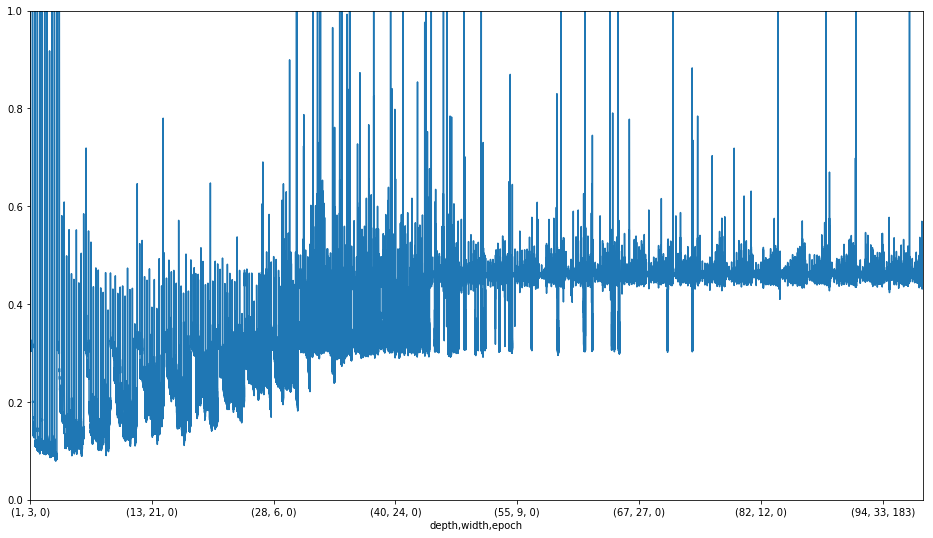

In [5]:
dataframe["val_loss"].plot(figsize=(16,9))
plt.ylim(0, 1)
plt.show()

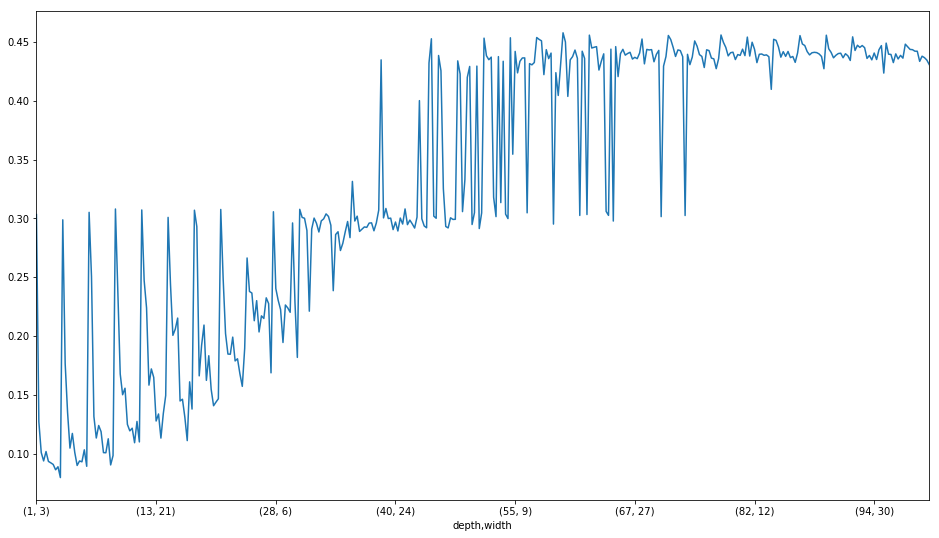

In [6]:
min_losses.plot(figsize=(16,9))
plt.show()

In [7]:
def plot3d_loss(dataframe, zlim=None):
    X = dataframe.index.levels[0]
    Y = dataframe.index.levels[1]
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(
            np.array(list(map(lambda x: dataframe[x[0], x[1]], np.reshape(np.dstack((X,Y)), (X.shape[0]*X.shape[1],2))))),
            X.shape)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=None, antialiased=True, cmap=cm.coolwarm_r)
    ax.view_init(azim=225)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Width")
    ax.set_xlim(X[0,0], X[-1,-1])
    ax.set_ylim(Y[0,0], Y[-1,-1])
    ax.set_zlim(zlim)
    ax.set_zlabel("Loss", rotation=90)

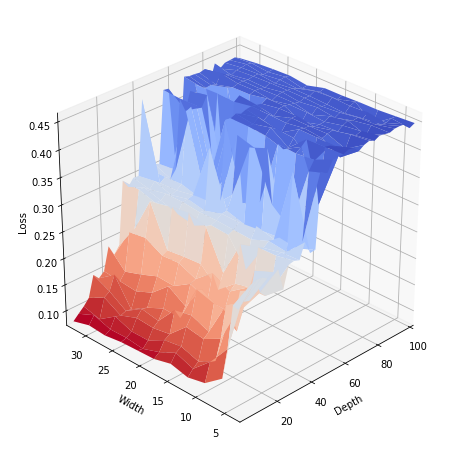

In [8]:
plot3d_loss(min_losses)
plt.show()

In [9]:
print(dataframe.min(), dataframe.idxmin(), sep="\n")

loss        0.014214
val_loss    0.079747
dtype: float32
loss        (13, 33, 981)
val_loss     (1, 33, 448)
dtype: object


## With dropout regularization

In [10]:
directory, _, files = next(os.walk("models/experiment03.5"))
h5_files = tuple(file for file in files if os.path.splitext(file)[1] == ".h5")
csv_files = tuple(file for file in files if os.path.splitext(file)[1] == ".csv")
stats = [(parse_model_repr(os.path.splitext(file)[0]),
          pd.read_csv(os.path.join(directory, file), header=0, index_col=0,
                      dtype={"epoch":int, "loss":np.float32, "val_loss":np.float32}))
         for file in csv_files]
parameters, stats_data = zip(*stats)
dataframe = pd.concat(stats_data, keys=[(p.depth, p.width) for p in parameters],
                      names=["depth", "width"])

In [11]:
dataframe.sort_index(inplace=True)

In [12]:
min_losses = dataframe["val_loss"].groupby(("depth", "width")).min()

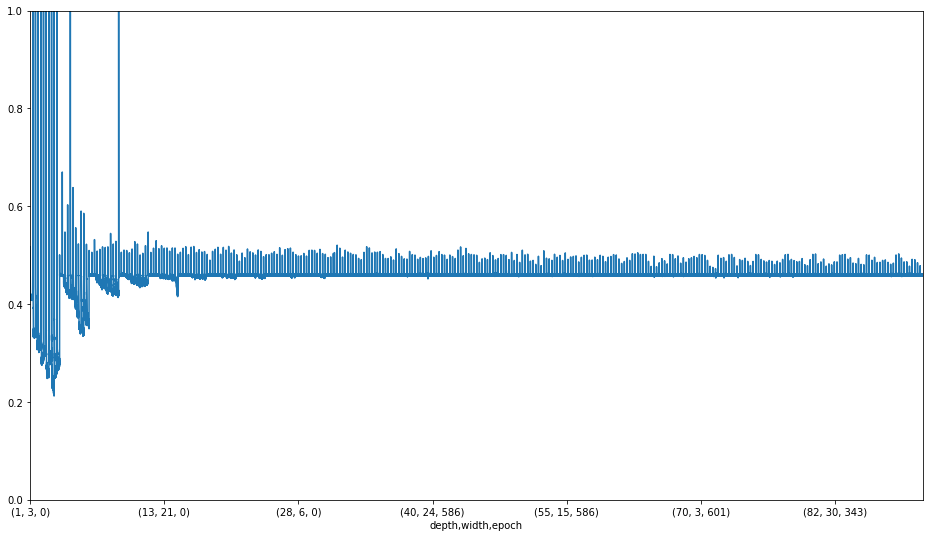

In [13]:
dataframe["val_loss"].plot(figsize=(16,9))
plt.ylim(0, 1)
plt.show()

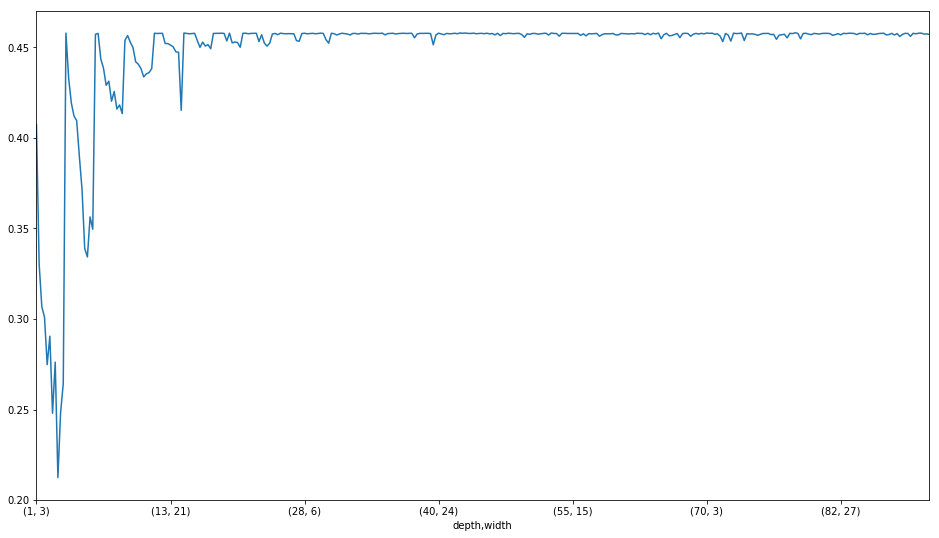

In [14]:
min_losses.plot(figsize=(16,9))
plt.show()

In [15]:
def plot3d_loss(dataframe, zlim=None):
    X = dataframe.index.levels[0]
    Y = dataframe.index.levels[1]
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(
            np.array(list(map(lambda x: dataframe.get((x[0], x[1]), default=0.5),
                              np.reshape(np.dstack((X,Y)), (X.shape[0]*X.shape[1],2))))),
            X.shape)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=None, antialiased=True, cmap=cm.coolwarm_r)
    ax.view_init(azim=225)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Width")
    ax.set_xlim(X[0,0], X[-1,-1])
    ax.set_ylim(Y[0,0], Y[-1,-1])
    ax.set_zlim(zlim)
    ax.set_zlabel("Loss", rotation=90)

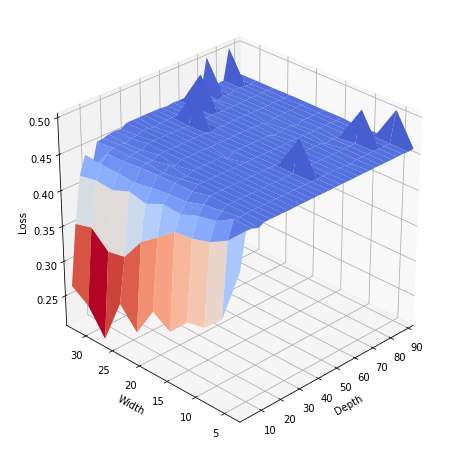

In [16]:
plot3d_loss(min_losses)
plt.show()

In [17]:
print(dataframe.min(), dataframe.idxmin(), sep="\n")

loss        0.215496
val_loss    0.212413
dtype: float32
loss        (1, 27, 913)
val_loss    (1, 27, 962)
dtype: object
